<a href="https://colab.research.google.com/github/czn-py/Deep-Learning-Project/blob/main/Project_Two_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT TWO : DEEP LEARNING

**Introduction**:
 In this project, we will explore the CIFAR-10 dataset using the TensorFlow and NumPy libraries in Python. The primary goal is to classify the images using Artificial Neural Network(ANN) and Convolutional Neural Network (CNN).
The CIFAR-10 dataset consists of 60,000color images in 10 classes. The dataset is divided into two sets: a training set with 50,000 images and a test set with 10,000 images.


---



**Data Pre-Processing:**
Data pre-processing is a crucial step in preparing the datasets for Machine Learning models.Its main objective is to transform the raw data into appropriate formats which facilitates effective model training and evaluation.

  *Image Resizing*: The images have been resized to 32x32 pixels, and the color channels have been preserved.Resizing ensures that all the images have consistent size for optimal model performance.

  *Normalizing the pixels:* The pixel values of each image in both the training and test datasets were divided by 255, as the maximum pixel value in a color image is 255. This operation scales down the pixel values to the range of [0, 1].Normalization ensures that all pixel values fall within the same numerical range, making it easier for the model to learn and converge efficiently during training.


---


**ANN Model Architechture:**
The ANN Model Architecture is created using the TensorFlow Keras API. The model is created as a sequential stack of three fully connected layers and a softmax output layer. It consists of the following layers:

*  *Flatten Layer:* This is the input layer of the neural network.This layer converts the 32x32x3 matrices in a One Dimensional Vector with 2352 nodes.

*  *First Dense Layer:* The first dense layer has 128 nodes, and the activation function used is Rectified Linear Unit (ReLU). ReLU activation is widely used in neural networks due to its ability to introduce non-linearity while being computationally efficient.
* *Second Dense Layer:* The second dense layer has 64 nodes, and again, ReLU is used as the activation function.
* *Output Layer:* The third dense layer is the output layer with 10 nodes that corresponds to the 10 different classification labels.Softmax activation function has been used in the model. Softmax activation function converts the output scores into a probability score. The class with highest probability score will be selected as the predicted classification for the class.


---


**Model Compilation & Training**

Compilation configures the model for training.Following were the hyper parameters used for model compilation.

* *Optimizer:* Adam (Adaptive Moment Estimation) has been used as an optimizer.The learning rate for the Adam optimizer is set to 0.0001, which controls the step size during gradient descent.
* *Loss Function*: Sparse Categorical Crossentropy
* *Metrics* : Accuracy has been used as the metric for evaluation.It is the measure of how well the model predicts the correct class labels compared to the true labels
* *Model Training :* The compiled model has been trained using the model.fit() function. The model will run for 10 iterations (epochs).The batch size is set to 64.So,during each iteration the model will process 64 samples from the training dataset, calculate the loss, and then update the model's parameters based on these 64 samples.
The model's performance on unseen(test) data is evaluated on test data. It is essential to give us and idea on the model's ability to generalize and identify overfitting issues.


---


**Result of the Analysis:**

*First Run:*

We were able to attain the accuracy of 0.4594.The loss curve indicates that the model starts with good generalization (testing loss below training loss) but eventually starts to overfit (testing loss goes above training loss)at epochs =6. However, the fact that the gaps between the testing and training loss are not increasing significantly means that the model is not overfitting drastically. Optimal number of Epochs =6

*Second Run:*

The model does seem to have serious overfitting issue. So,the learning rate was kept the same. However, the following hyper-parameters were changed with the aim to address the lower accuracy rate.


*   *Increased Nodes in dense Layer :* The number of nodes in the first dense layer was increased from 128 to 256, and in the second dense layer, it was increased from 64 to 128. This change aims to make the model more complex and potentially capture more intricate patterns in the data.

*  *Decreased Batch Size:*
    The batch size was decreased from its previous value to 32. Smaller batch sizes often lead to noisier updates, but they can help the model generalize better as they see more diverse samples in each update.


    

*Result of Second Run:*
    After updating the above parameters we can see that there have been a slight increase in the accuracy to 0.4773. The loss curve converged after epochs =4. so stopping at epochs=4 would be optimal. Interms of overfitting the second run also does not seems to have serious overfitting issue as the lines are close after the convergion.
    
We will consider the second run model the final ANN model as it has the higher accuracy and prediction will be made using the model in second run.


---



*Prediction:*

Prediction of the image indexed 666 in the test data set was made. The ANN model predicted Automobile for the Truck image. This is probably due to the lower accuracy score of 0.4773.



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


cifar10=tf.keras.datasets.cifar10 # Import CIFAR-10 Dataset
(train_xs,train_ys),(test_xs,test_ys)= cifar10.load_data()
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
# Print Class Names
for i,class_name in enumerate(class_names,start=0):
  print('Class {}: {}'.format(i,class_name))

Class 0: Airplane
Class 1: Automobile
Class 2: Bird
Class 3: Cat
Class 4: Deer
Class 5: Dog
Class 6: Frog
Class 7: Horse
Class 8: Ship
Class 9: Truck


In [ ]:
# Data Exploration

print('No.of images in train dataset: {}\nNo.of images in test dataset: {}'.format(len(train_xs),len(test_xs)))
print('Image Size: {}'.format(train_xs[555].shape))
my_labels = np.unique(test_ys)
print(my_labels)
print(np.unique(train_ys))


No.of images in train dataset: 50000
No.of images in test dataset: 10000
Image Size: (32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


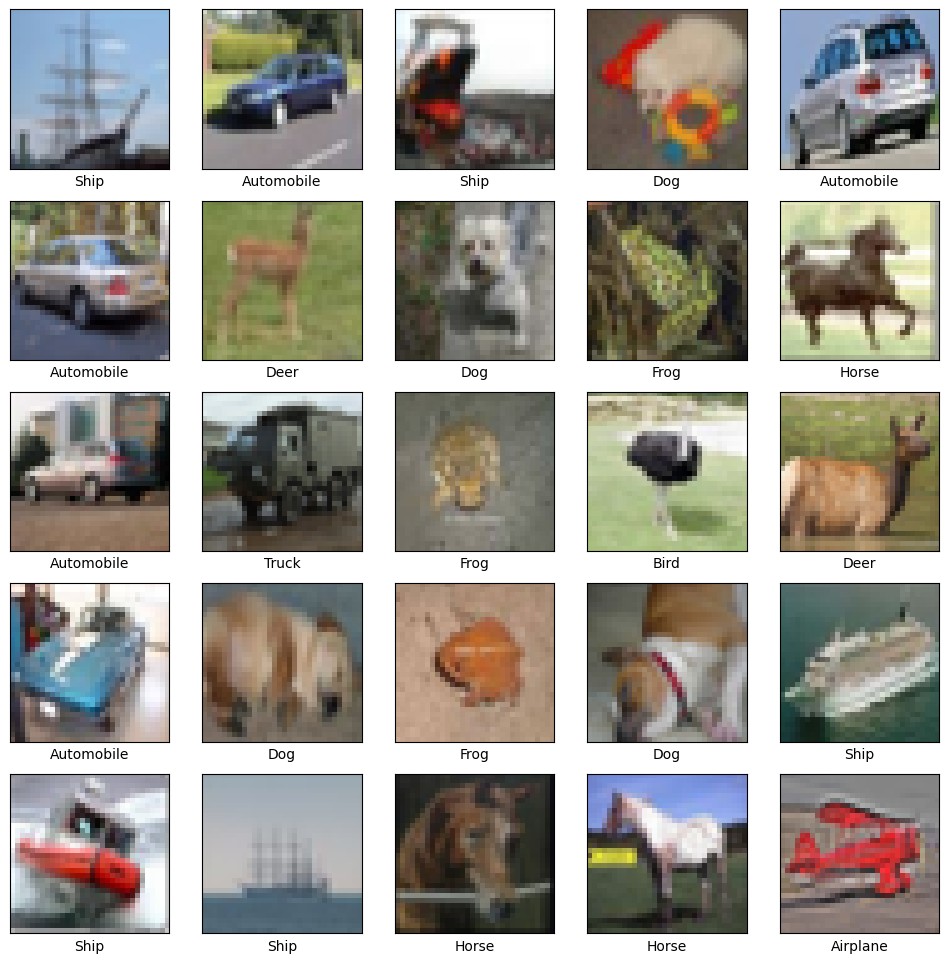

In [ ]:
# Display sample images in train dataset
plt.figure(figsize=(12, 12))
samp_train = random.sample(range(len(train_xs)),25)
for i,idx in enumerate(samp_train):
  plt.subplot(5,5,i+1)
  images = train_xs[samp_train[i]]
  labels = int(train_ys[samp_train[i]])
  plt.imshow(images,cmap=plt.cm.binary)
  plt.xlabel(class_names[labels])
  plt.xticks([])
  plt.yticks([])
plt.show()

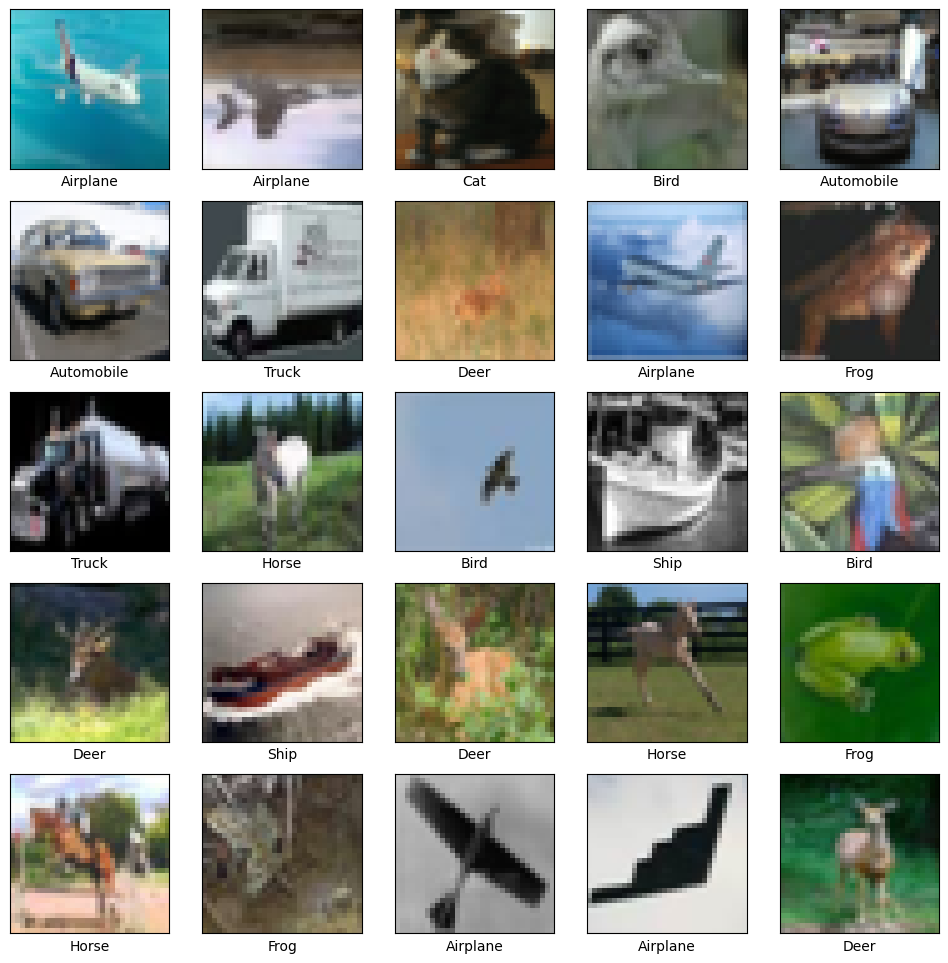

In [ ]:
# Display sample images in test dataset
plt.figure(figsize=(12, 12))
samp_test = random.sample(range(len(test_xs)),25)
for i,idx in enumerate(samp_test):
  plt.subplot(5,5,i+1)
  images = test_xs[samp_test[i]]
  labels = int(test_ys[samp_test[i]])
  plt.imshow(images,cmap=plt.cm.binary)
  plt.xlabel(class_names[labels])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
# Data Pre-processing
  # Resize the images
train_xs = train_xs.reshape(50000,32,32,3)
test_xs = test_xs.reshape(10000,32,32,3)
  # Normalise the pixels
train_xs = train_xs/255
test_xs = test_xs/255

In [ ]:
# ANN Model Architecture-1st Run
model = tf.keras.models.Sequential([
           tf.keras.layers.Flatten(input_shape =(32,32,3)),     # Converting matrix (32,32,3) to vector 2352 nodes
           tf.keras.layers.Dense(128, activation=tf.nn.relu),   # A dense layer with 128 nodes and ReLU as the choice of the activation function
           tf.keras.layers.Dense(64, activation=tf.nn.relu),    # A Dense layer with 64 nodes and relu as activation function.
           tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer with 10 nodes (because there are 10 classifications)
])

In [ ]:
# ANN Model Compilation & Training-1st Run
model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
model.summary()
history= model.fit(train_xs, train_ys, epochs=10,batch_size = 64,verbose=0,validation_data = (test_xs,test_ys))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               393344    
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Test the performance of the model on test data set
model.evaluate(test_xs, test_ys)

313/313 [==============================] - 1s 3ms/step - loss: 1.5281 - accuracy: 0.4594


[1.5281133651733398, 0.4593999981880188]

313/313 [==============================] - 1s 3ms/step - loss: 1.5281 - accuracy: 0.4594
Train Loss : [1.4782869815826416, 0.47991999983787537]
Test Loss : [1.5281133651733398, 0.4593999981880188]


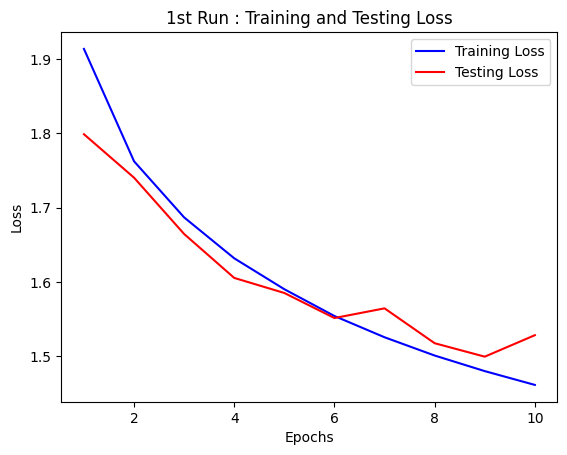

In [ ]:
#plot showing loss curve for training and testing.
train_loss = model.evaluate(train_xs,train_ys)
test_loss = model.evaluate(test_xs,test_ys)
print('Train Loss :', train_loss)
print('Test Loss :',test_loss)

import matplotlib.pyplot as plt

# Access the loss values from the history object
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

# Plot the loss curves
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, testing_loss, 'r', label='Testing Loss')
plt.title('1st Run : Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



---



ANN Model with the new hyperparameters

In [ ]:
# ANN Model Architecture-2nd Run
model = tf.keras.models.Sequential([
           tf.keras.layers.Flatten(input_shape =(32,32,3)),     # Converting matrix (32,32,3) to vector 2352 nodes
           tf.keras.layers.Dense(256, activation='relu'),   # A dense layer with 256 nodes and ReLU as the choice of the activation function
           tf.keras.layers.Dense(128, activation='relu'),    # A Dense layer with 128 nodes and relu as activation function.
           tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer with 10 nodes (because there are 10 classifications)
])

In [ ]:
# ANN Model Compilation & Training- 2nd Run
model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
model.summary()
history= model.fit(train_xs, train_ys, epochs=10,verbose=0,batch_size= 32,validation_data = (test_xs,test_ys))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               786688    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Test the performance of the model on test data set
model.evaluate(test_xs, test_ys)

313/313 [==============================] - 1s 3ms/step - loss: 1.4834 - accuracy: 0.4773


[1.4834024906158447, 0.4772999882698059]

313/313 [==============================] - 1s 3ms/step - loss: 1.4834 - accuracy: 0.4773
Train Loss : [1.4021425247192383, 0.5011199712753296]
Test Loss : [1.4834024906158447, 0.4772999882698059]


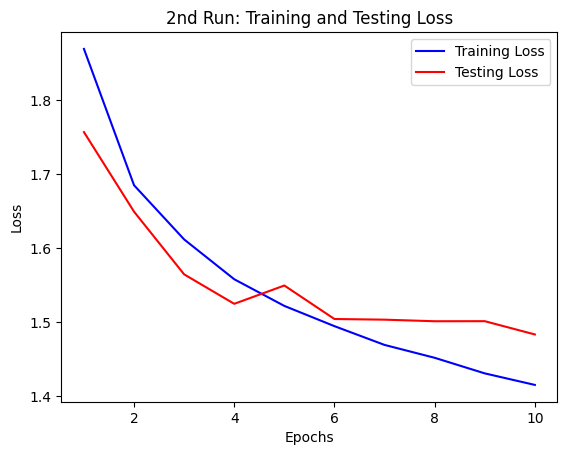

In [ ]:
#plot showing loss curve for training and testing.
train_loss = model.evaluate(train_xs,train_ys)
test_loss = model.evaluate(test_xs,test_ys)
print('Train Loss :', train_loss)
print('Test Loss :',test_loss)

import matplotlib.pyplot as plt

# Access the loss values from the history object
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

# Plot the loss curves
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, testing_loss, 'r', label='Testing Loss')
plt.title('2nd Run: Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

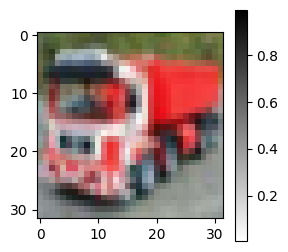

313/313 [==============================] - 1s 2ms/step
[0.035 0.308 0.014 0.019 0.033 0.248 0.133 0.069 0.005 0.136]
Automobile


In [ ]:
# Prediction

plt.figure(figsize =(3,3))
img = test_xs[666]
plt.imshow(img,cmap=plt.cm.binary)
plt.colorbar()
plt.show()

pred = model.predict(test_xs)
prob = pred[666].round(3)
print(prob)
print(class_names[np.argmax(prob)])

In [ ]:
print('#'*75,'Image Classification using CNN MODEL','#'*75)

########################################################################### Image Classification using CNN MODEL ###########################################################################


**Introduction:**
Convolutional Neural Network (CNN) is a relatively advanced and preferred choice over ANN's for image classification problems. CNN's are capable of better capturing intricate patterns and also the spatial reationships in images.Due to the parameter sharing and performance capabilities CNN's excels in image classification problems when using large and complex data sets.

We are employing CNN over the same data set, CIFR-10 for classification and prediction purpose. The data has been pre-processed and ready for us to conduct the necessary analysis.


---



**CNN Model Architecture:**
CNN Model is using the sequential and connected stack of layers.The CNN model consists of two convolutional layers, each followed by a max-pooling layer for spatial downsampling. The flattened output from the last max-pooling layer is passed through a fully connected (dense) hidden layer with 128 nodes and a ReLU activation function. Finally, the output layer with 10 nodes and a softmax activation function is used for multi-class classification.



*   *Conv2D Layer:* This is the first 2D convolutional layer. It has 64 filters, each with a size of (5, 5). The activation parameter is set to 'relu'.This sets the input shape of the first layer. It indicates that the input images have a size of 32x32 pixels with 3 channels (RGB images). No padding has been applied.

*   *MaxPooling2d Layer:* This is a Pooling Layer.The pool_size is (2, 2), and the strides are set to (1, 1), meaning the pooling window moves one pixel at a time.

* *Conv2D Layer:* The second 2D Convolutional layer with the hyperparameters same as the first convolutional layer.
* *MaxPooling2D Layer:* This is the second 2D Max Pooling layer with the hyperparameters same as the first max pooling layer.
* *Flatten Layer:* This layer flattens the 2D feature maps into a 1D vector.
* *Dense Layer:*This is a fully connected (dense) layer. It connects all neurons from the previous layer to every neuron in this layer. It has 128 nodes, and the activation function is 'relu'.
* *Output Dense Layer:* This is the output layer with 10 nodes, corresponding to the 10 classes in the classification problem. The activation function is 'softmax', which converts the final output into a probability distribution over the classes.


---


**Result of the analysis:**

*First Run:* At learning rate of 0.001,we got the accuracy value of 0.6224 which is higher in comparison to the ANN Models above. The loss curves shows there is a significant overfitting issue. The loss curves converge early at epochs =3.Post conversion the gap between the lines start to increase reflecting the overfitting issue. The Optimal number of Epochs = 3.

*Second Run:* To address the existing overfitting issue from the first run,and to increase the accuracy, following hyper parameters were changed in the second run.
*   Decreased learning rate to 0.0001 to address the overfitting issue.
*   Increased number of nodes in the dense layer from 128 to 256.

*   Added the Padding to preserve the spatial dimensions.
   
*   Decreased filter size from 64 to 32
*   Decreased kernel size in the first Conv2D layer  from (5, 5) to (3, 3) to ensure they capture fine details.

In the second run, we were able to get the increased accuracy score of 0.6719 by adjusting the above parameters.Also the loss curves reflect that there is less overfiting issue in comparision to the earlier CNN Model. The curves converges at epochs=3 which would be the optimal number of epochs.


---


**Prediction :**
The prediction has been made using the improved CNN Model. The CNN model has been implemented to predict the image in the test dataset indexed 6666.The model has accurately been able to predict the image label.

*ANN Vs CNN Model:* Relatively, Convolutional Neural Network performed far more accurately than the Artificial Neural Network. The accuracy was significantly increased using the CNN Model. However, ANN appeared to be much more computationally efficient as it took lessser time to train and test the model.

In [ ]:
# Convert labels to one-hot encoded format
num_classes = 10
train_ys = tf.keras.utils.to_categorical(train_ys, num_classes)
test_ys = tf.keras.utils.to_categorical(test_ys, num_classes)


In [ ]:
from tensorflow.python.ops.gen_nn_ops import Relu
# CNN Model Architecture-1st Run
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(5,5),activation = 'relu',input_shape =(32,32,3),padding='valid'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides =(1,1)),
  tf.keras.layers.Conv2D(64,(5,5),activation = 'relu',padding='valid'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides =(1,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation= 'relu'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
# CNN Model Comilation-1st Run
cnn_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
cnn_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 23, 23, 64)        102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 30976)             0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [ ]:
# CNN Model Training- 1st Run
history = cnn_model.fit(train_xs,train_ys,epochs= 10,verbose= None,validation_data=(test_xs,test_ys))

In [ ]:
# Test the performance of the model on test data set
cnn_model.evaluate(test_xs, test_ys)

313/313 [==============================] - 1s 4ms/step - loss: 1.2956 - accuracy: 0.6224


[1.2955905199050903, 0.6223999857902527]

In [ ]:
# Training Loss Calculation
training_loss = history.history['loss']
testing_loss = history.history['val_loss']
print('Train Loss:',training_loss)
print('Test Loss:',testing_loss)

Train Loss: [1.6001620292663574, 1.3040236234664917, 1.1640658378601074, 1.0596041679382324, 0.9700644016265869, 0.8865897059440613, 0.8135543465614319, 0.7381584644317627, 0.6613052487373352, 0.5935559868812561]
Test Loss: [1.416591763496399, 1.266700029373169, 1.148017168045044, 1.1235779523849487, 1.1527388095855713, 1.0859127044677734, 1.126451015472412, 1.1828385591506958, 1.2424196004867554, 1.2955905199050903]


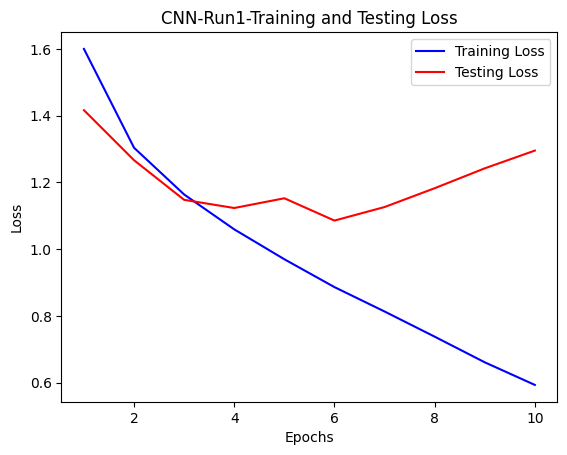

In [ ]:
# Loss Curves
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, testing_loss, 'r', label='Testing Loss')
plt.title('CNN-Run1-Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

CNN with new Hyper-parameters

In [ ]:
# CNN Model Architecture-2nd Run
cnn_model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape =(32,32,3),padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides =(1,1)),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides =(1,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256,activation= 'relu'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
# CNN Model Compilation-2nd Run
cnn_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
cnn_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 57600)             0         
                                                                 
 dense_18 (Dense)            (None, 256)              

In [ ]:
# CNN Model Training
history = cnn_model.fit(train_xs,train_ys,epochs= 5,validation_data=(test_xs,test_ys))

Epoch 1/5
1563/1563 [==============================] - 17s 10ms/step - loss: 1.4527 - accuracy: 0.4782 - val_loss: 1.2187 - val_accuracy: 0.5733
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1413 - accuracy: 0.6008 - val_loss: 1.0996 - val_accuracy: 0.6151
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0167 - accuracy: 0.6463 - val_loss: 1.0245 - val_accuracy: 0.6454
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9275 - accuracy: 0.6784 - val_loss: 1.0179 - val_accuracy: 0.6417
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8523 - accuracy: 0.7049 - val_loss: 0.9457 - val_accuracy: 0.6719


In [ ]:
# Test the performance of the model on test data set
cnn_model.evaluate(test_xs, test_ys)

313/313 [==============================] - 1s 4ms/step - loss: 0.9457 - accuracy: 0.6719


[0.9457319378852844, 0.6718999743461609]

In [ ]:
# Loss Calculation
training_loss = history.history['loss']
testing_loss = history.history['val_loss']
print('Train Loss:',training_loss)
print('Test Loss:',testing_loss)

Train Loss: [1.4527301788330078, 1.14131760597229, 1.0166921615600586, 0.9274992942810059, 0.8523374199867249]
Test Loss: [1.218748927116394, 1.0996307134628296, 1.024454116821289, 1.0178554058074951, 0.9457319378852844]


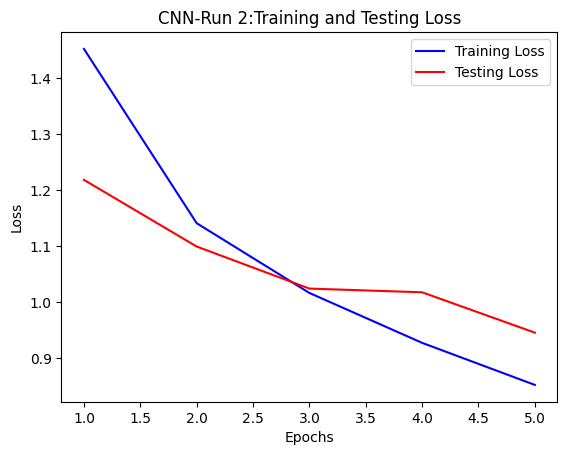

In [ ]:
# Loss Curves
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, testing_loss, 'r', label='Testing Loss')
plt.title('CNN-Run 2:Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

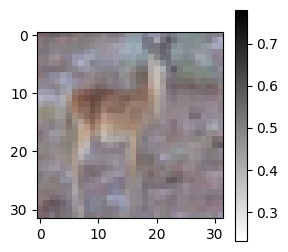

313/313 [==============================] - 1s 2ms/step
[0.177 0.01  0.124 0.126 0.253 0.121 0.049 0.071 0.056 0.014]
Deer


In [ ]:
# Prediction

plt.figure(figsize =(3,3))
img = test_xs[5555]
plt.imshow(img,cmap=plt.cm.binary)
plt.colorbar()
plt.show()

pred = model.predict(test_xs)
prob = pred[5555].round(3)
print(prob)
print(class_names[np.argmax(prob)])